In [148]:
import os
import ads
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [149]:
os.environ["ADS_DEV_KEY"] = "kNUoTurJ5TXV9hsw9KQN1k8wH4U0D7Oy0CJoOvyw" # (open('dev_key.txt','r')).read() for text file containing just dev key

In [150]:
ads.config.token = 'ADS_DEV_KEY'

In [151]:
x = raw_input('--> ') # the first term you want to search 

--> stars


In [152]:
y = raw_input('--> ') # the second term you want to search for comparison

--> black holes


In [153]:
z = raw_input('--> ') # the third term you want to search for comparison

--> supernova


In [154]:
papers1 = list(ads.SearchQuery(title= x, fq="bibgroup:cfa", sort= "pubdate"))

In [155]:
papers2 = list(ads.SearchQuery(title= y, fq="bibgroup:cfa", sort= "pubdate"))

In [156]:
papers3 = list(ads.SearchQuery(title= z, fq="bibgroup:cfa", sort= "pubdate"))

In [157]:
print papers1[0].author
print type(papers1)

[u'Ginsburg, Idan', u'Wang, Xiawei', u'Loeb, Abraham', u'Cohen, Ofer']
<type 'list'>


In [158]:
# Find the mean number of authors for the whole set of results of cfa papers1
s = []
for i in papers1:
    auth_per_paper1 = [len(i.author)]
    s.append(auth_per_paper1)
avg1 = scipy.mean(s)
print avg1

10.42


In [159]:
# Find the mean number of authors for the whole set of results of cfa papers2
s2 = []
for i in papers2:
    auth_per_paper2 = [len(i.author)]
    s2.append(auth_per_paper2)
avg2 = scipy.mean(s2)
print avg2

7.08


In [160]:
# Find the mean number of authors for the whole set of results of cfa papers3

s3 = []
for i in papers3:
    auth_per_paper3 = [len(i.author)]
    s3.append(auth_per_paper3)
avg3 = scipy.mean(s3)
print avg3

16.405


In [161]:
new_s = [i[0] for i in s]
new_s2 = [i[0] for i in s2]
new_s3 = [i[0] for i in s3]

In [162]:
rows = zip(new_s,new_s2,new_s3)

In [163]:
with open('search.csv', 'wb') as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [164]:
results = pd.read_csv('search.csv')
results.columns = [x,y,z]

In [165]:
 m_results = pd.melt(results)

In [166]:
m_results.columns = ['Search','Authors']

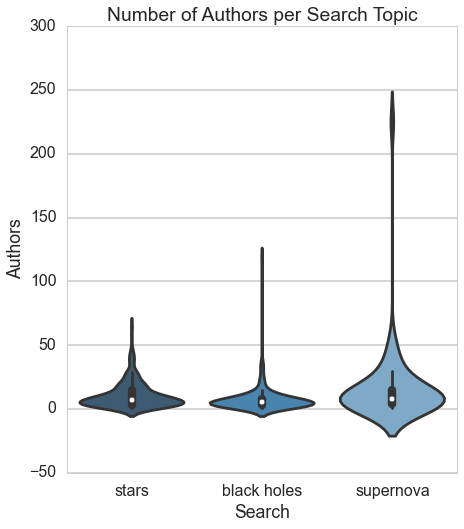

In [190]:
%matplotlib inline
sns.set_context("poster")
plt.figure(figsize=(7, 8))
v_plot = sns.violinplot(x="Search", y="Authors", data=m_results, palette="Blues_d", scale="count")
v_plot.set_title('Number of Authors per Search Topic')